In [27]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import datetime

In [29]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2025,8,1)

In [30]:
nvidia = yf.download('NVDA', start, end, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [31]:
nvidia.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-07-25,173.500000,174.720001,172.960007,173.610001,122316800
2025-07-28,176.750000,177.000000,173.970001,174.020004,140023500
2025-07-29,175.509995,179.380005,175.020004,177.960007,154077500
2025-07-30,179.270004,179.889999,176.039993,176.509995,174312200
2025-07-31,177.869995,183.300003,175.929993,182.899994,221685400


In [32]:
palantir = yf.download('PLTR', start, end,auto_adjust=True)
microsoft = yf.download('MSFT',start,end,auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
microsoft.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.042328,153.147139,150.860371,151.289138,22622100
2020-01-03,151.136642,152.403898,150.603064,150.850807,21116200
2020-01-06,151.527298,151.594002,149.126182,149.669298,20813700
2020-01-07,150.145721,152.137116,149.897993,151.803637,21634100
2020-01-08,152.537292,153.213803,150.498254,151.432015,27746500


Visualizing the data


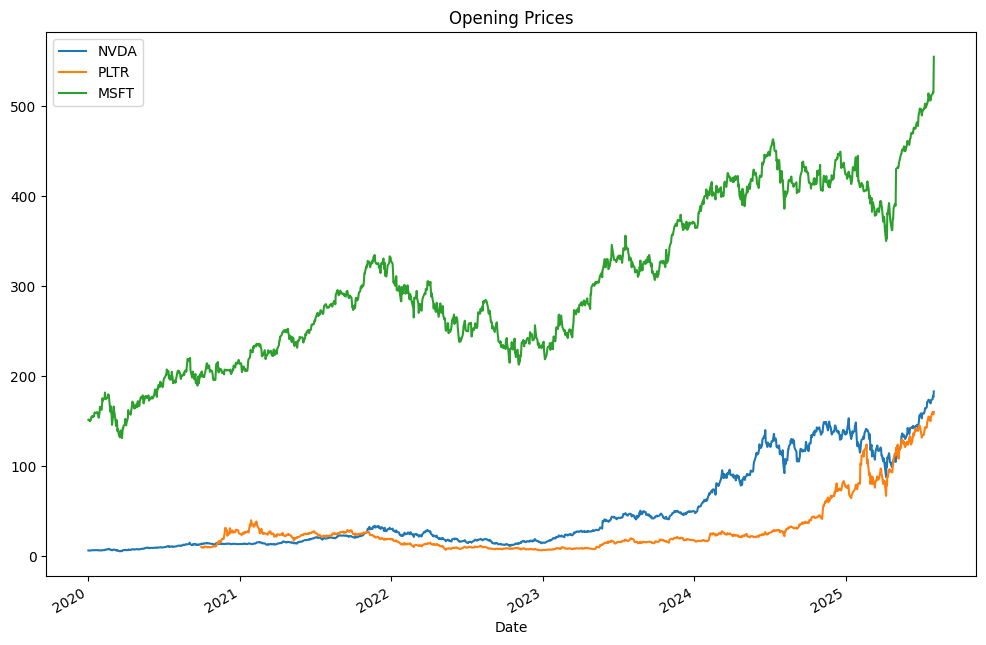

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
nvidia['Open'].plot(ax=ax, label="NVIDIA")
palantir['Open'].plot(ax=ax, label="PALANTIR")
microsoft['Open'].plot(ax=ax, label="MICROSOFT")
ax.set_title('Opening Prices')
ax.legend()

plt.show()


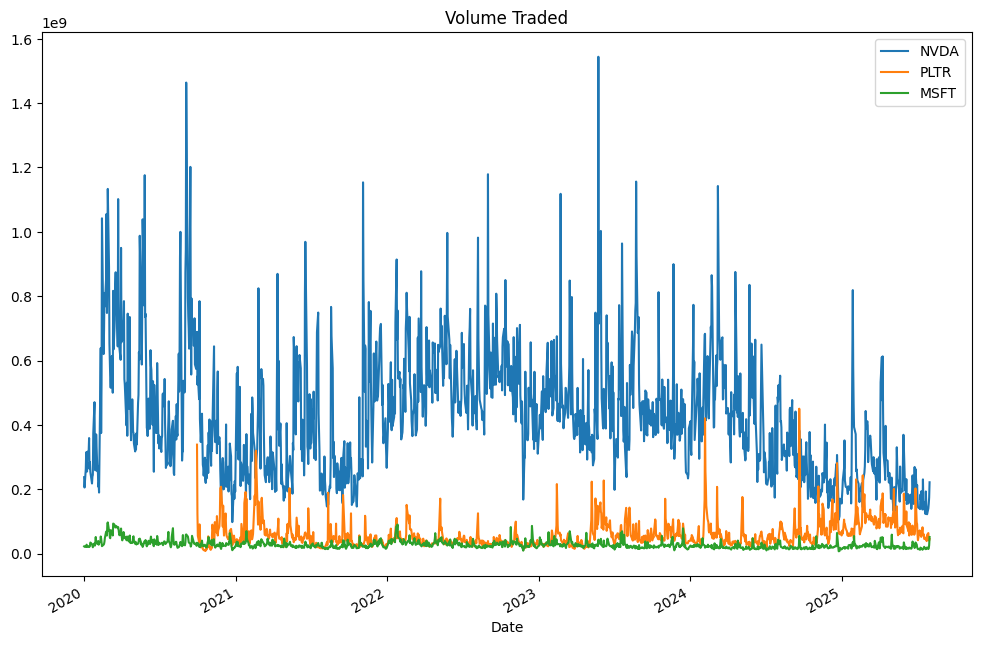

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
nvidia['Volume'].plot(ax=ax, label="NVIDIA")
palantir['Volume'].plot(ax=ax, label="PALANTIR")
microsoft['Volume'].plot(ax=ax, label="MICROSOFT")
ax.set_title('Volume Traded')
ax.legend()

There is the biggest spike in the mid 2023 for Nvidia lets find out why?

In [36]:
nvidia['Volume'].idxmax()

Ticker
NVDA   2023-05-25
dtype: datetime64[ns]

Nvidia's stock surged to a record high, jumping approximately 24% to $41.91, driven by a significantly better-than-expected earnings report and a forecast for a 50% increase in quarterly revenue, fueled by surging demand for its artificial intelligence (AI) chips.

Total amount of money being traded

In [37]:
nvidia['Total traded'] = nvidia['Open']*nvidia['Volume']
palantir['Total traded'] = palantir['Open']*palantir['Volume']
microsoft['Total traded'] = microsoft['Open']*microsoft['Volume']

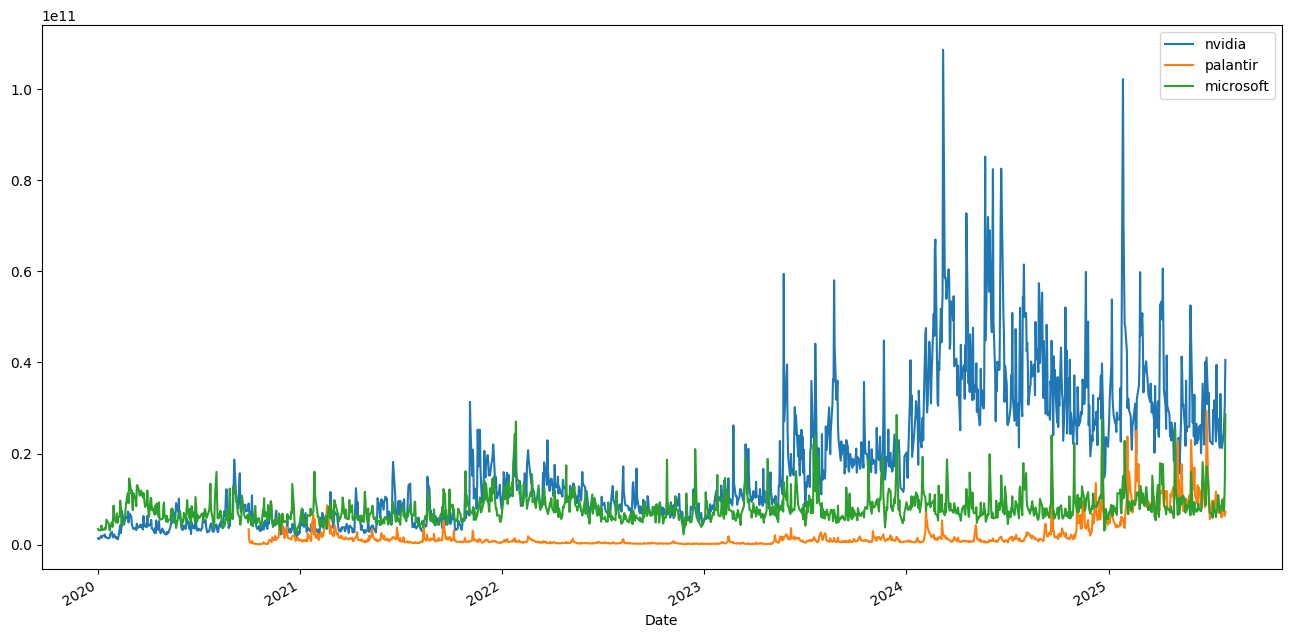

In [38]:
nvidia['Total traded'].plot(label = 'nvidia',figsize=(16,8))
palantir['Total traded'].plot(label = 'palantir')
microsoft['Total traded'].plot(label = 'microsoft')
plt.legend();

In [39]:
nvidia['Total traded'].idxmax()

Timestamp('2024-03-08 00:00:00')

What happened on 08-03-2024?


On March 8, 2024, NVIDIA (NVDA) experienced a significant stock decline after a strong rally, with the price dropping sharply as investors took profits following a 19% gain over the previous six trading days.

<Axes: xlabel='Date'>

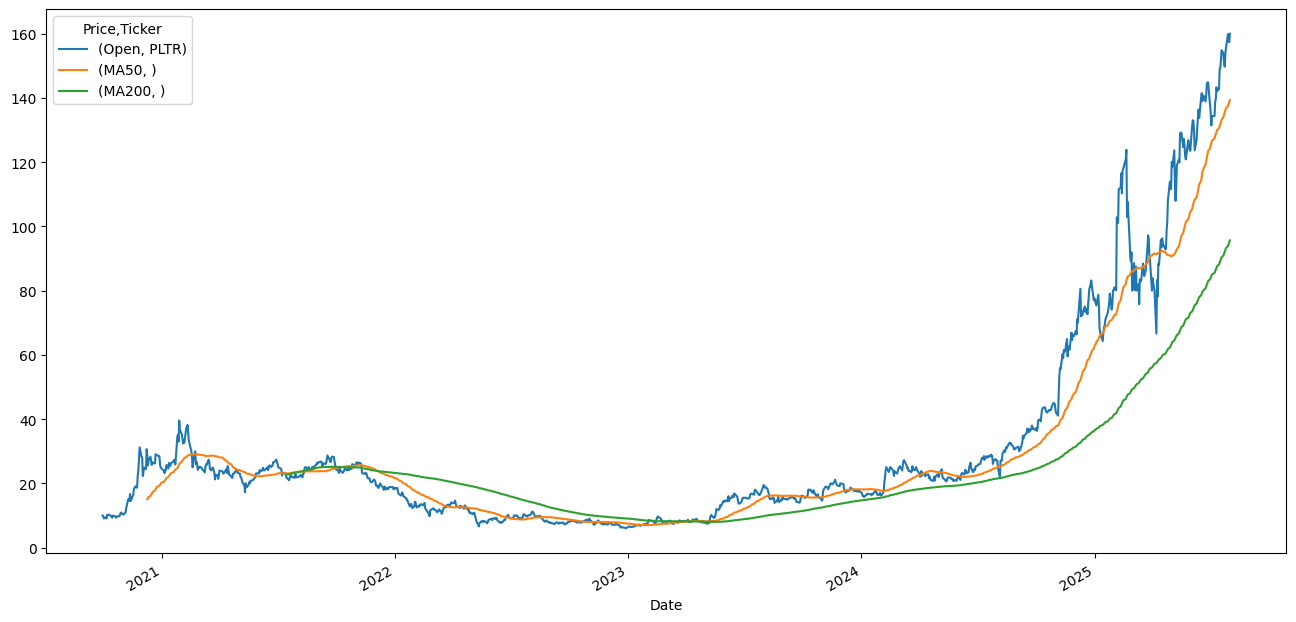

In [40]:
palantir['MA50'] = palantir['Open'].rolling(50).mean()
palantir['MA200'] = palantir['Open'].rolling(200).mean()
palantir[['Open','MA50','MA200']].plot(figsize=(16,8))

Lets see if these stocks have something in common as they are all backed by AI development

In [41]:
from pandas.plotting import scatter_matrix
AI_comp = pd.concat([nvidia['Open'],palantir['Open'],microsoft['Open']],axis = 1)
AI_comp.head()

Ticker,NVDA,PLTR,MSFT
Date,,,
2020-01-02,5.942873,NaN,151.289138
2020-01-03,5.852018,NaN,150.850807
2020-01-06,5.782820,NaN,149.669298
2020-01-07,5.929181,NaN,151.803637
2020-01-08,5.968013,NaN,151.432015


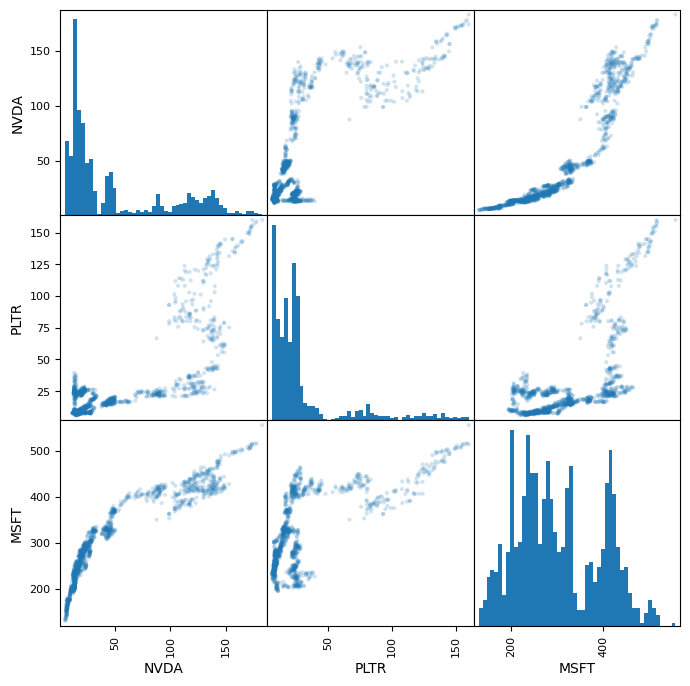

In [42]:
scatter_matrix(AI_comp,figsize=(8,8), alpha = 0.2,hist_kwds={'bins':50});

Basic Financial Analysis

Daily returns

In [43]:
nvidia[('DailyReturn', 'NVDA')] = nvidia[('Close', 'NVDA')].pct_change()
palantir[('DailyReturn', 'PLTR')] = palantir[('Close', 'PLTR')].pct_change()
microsoft[('DailyReturn', 'MSFT')] = microsoft[('Close', 'MSFT')].pct_change()

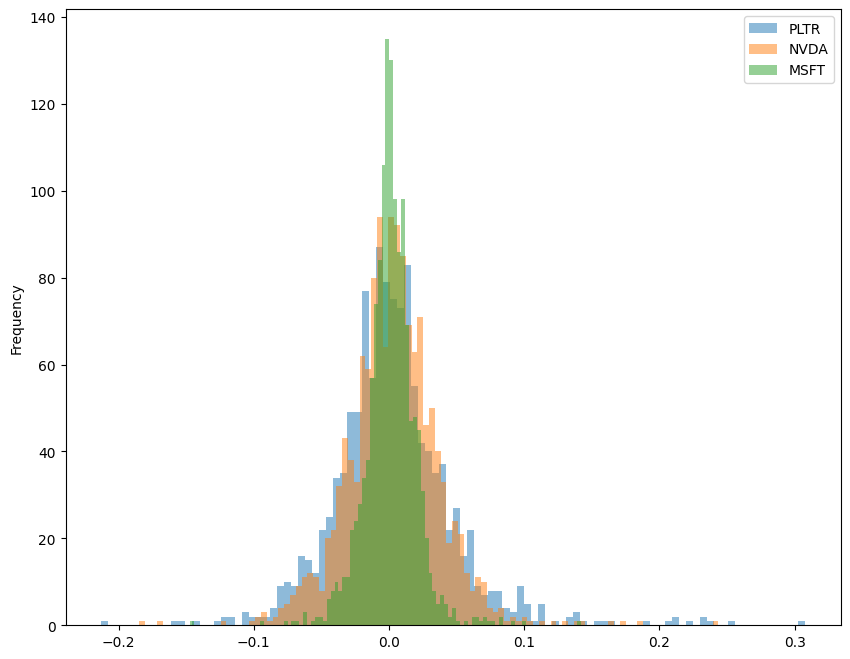

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
palantir['DailyReturn'].plot.hist(bins=100, alpha=0.5, label='PLTR', ax=ax)
nvidia['DailyReturn'].plot.hist(bins=100, alpha=0.5, label='NVDA', ax=ax)
microsoft['DailyReturn'].plot.hist(bins=100, alpha=0.5, label='MSFT', ax=ax)
plt.legend()
plt.show()

Kernel Density estimation

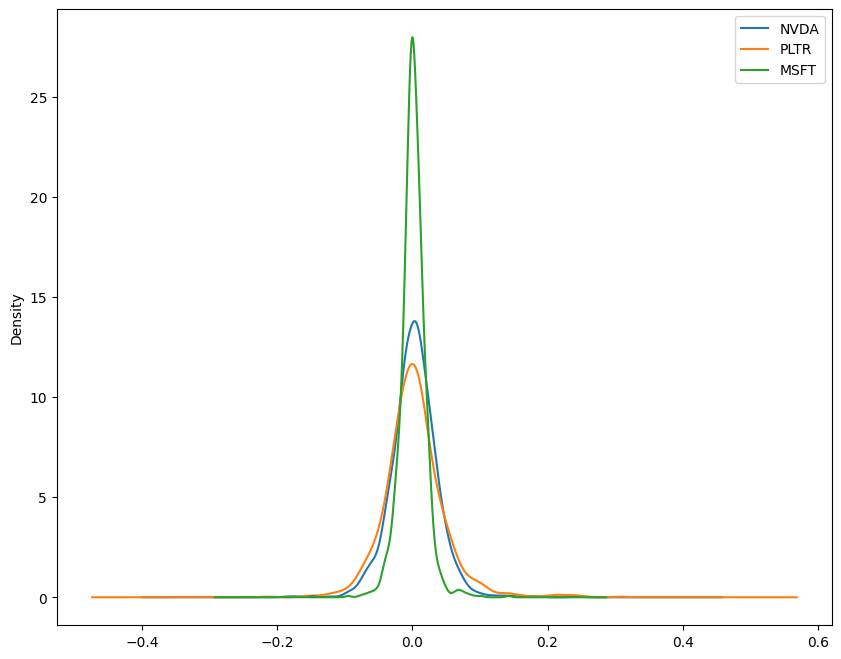

In [45]:
fig, ax = plt.subplots(figsize=(10,8))  # Create one figure and axes
nvidia['DailyReturn'].plot(kind='kde', label='NVDA', ax=ax)
palantir['DailyReturn'].plot(kind='kde', label='PLTR', ax=ax)
microsoft['DailyReturn'].plot(kind='kde', label='MSFT', ax=ax)
ax.legend()
plt.show()

<Axes: >

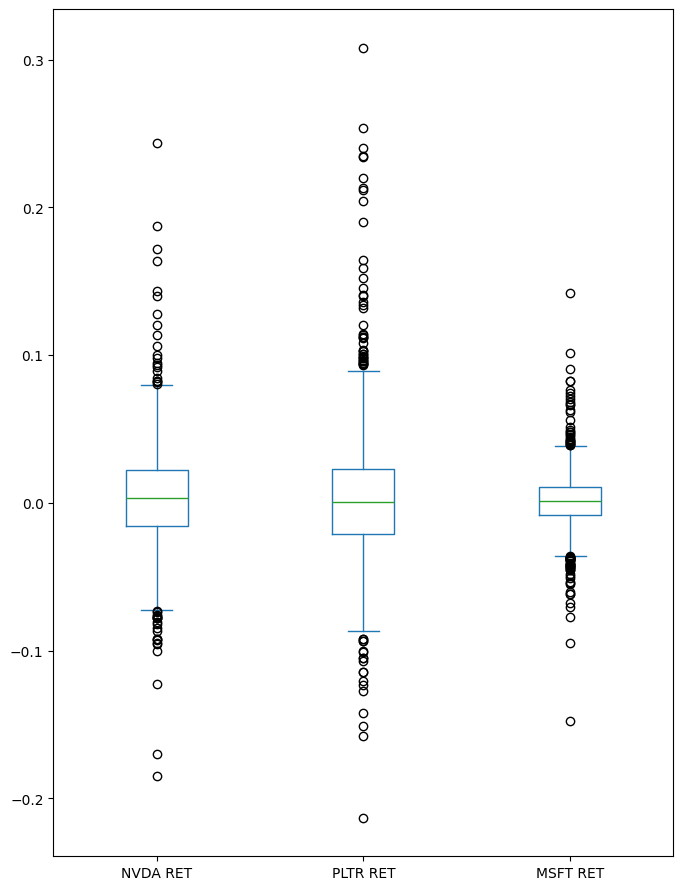

In [46]:
box_df = pd.concat([nvidia['DailyReturn'],palantir['DailyReturn'],microsoft['DailyReturn']])
box_df.columns = ['NVDA RET', 'PLTR RET','MSFT RET']
box_df.plot(kind='box',figsize=(8,11))

Cumulative Daily Return

In [47]:
nvidia['Cumulative Return','NVDA'] = (1+ nvidia['DailyReturn','NVDA']).cumprod()
microsoft['Cumulative Return','MSFT'] = (1+ microsoft['DailyReturn','MSFT']).cumprod()
palantir['Cumulative Return','PLTR'] = (1+ palantir['DailyReturn','PLTR']).cumprod()

Now Lets see which stock gave the highest return

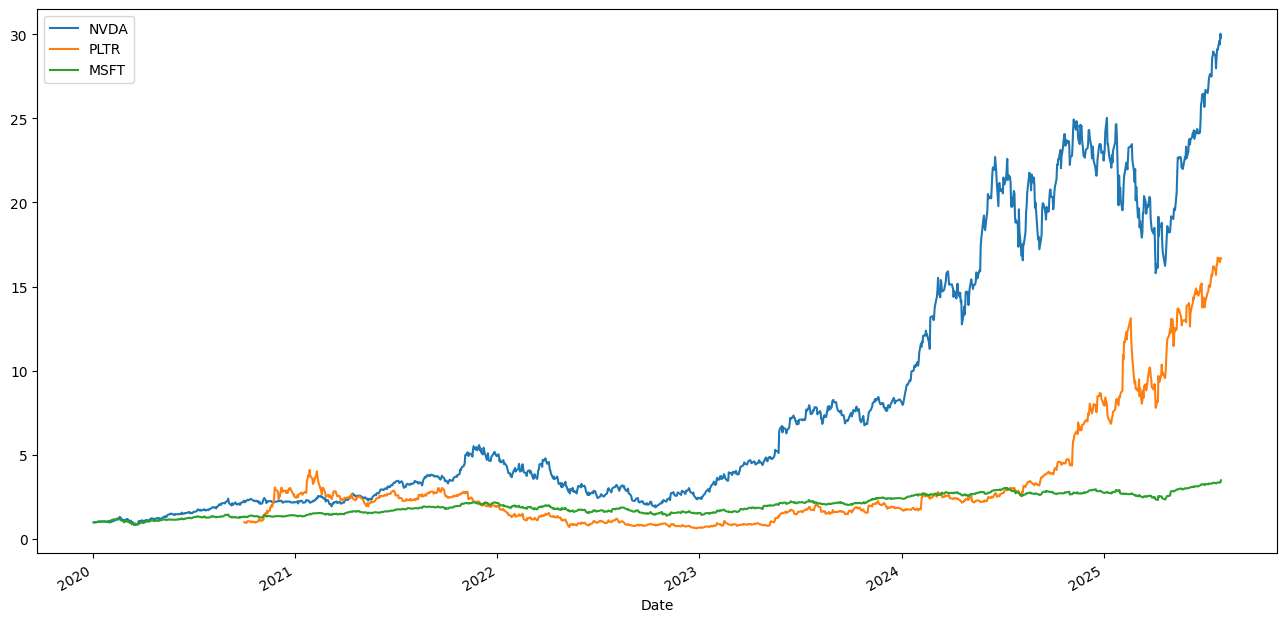

In [48]:
fig, ax = plt.subplots(figsize=(16,8))  
nvidia['Cumulative Return'].plot(ax=ax, label='NVDA')
palantir['Cumulative Return'].plot(ax=ax, label='PLTR')
microsoft['Cumulative Return'].plot(ax=ax, label='MSFT')
ax.legend()
plt.show()


